<a href="https://www.kaggle.com/code/mbhosseini70/challenges-of-deep-neural-network-training?scriptVersionId=142593728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div align="center">
  <font size="6"><b>Challenges of Deep Neural Network Training</b></font>
  </div>


# <b>Abstract</b>
Deep Neural Networks (DNNs) have revolutionized diverse fields, including computer vision, natural language processing, and speech recognition. These highly effective models, inspired by the human brain's structure, comprise multiple layers of interconnected neurons that learn representations of complex data. Despite their remarkable success, training deep neural networks remains a daunting task due to several challenges. This paper explores four significant obstacles commonly encountered during the training process, namely vanishing/exploding gradients, limited data, time constraints, and overfitting. Additionally, we present a detailed investigation of various solutions proposed in different papers to address these challenges.


# <b>Introduction</b>
The advent of Deep Neural Networks (DNNs) has revolutionized the field of artificial intelligence, leading to breakthroughs in various domains like computer vision, natural language processing, and speech recognition. These networks, inspired by the intricate structure of the human brain, excel at learning complex representations from vast amounts of data. Despite their remarkable success, training DNNs remains a challenging task, characterized by persistent difficulties. In this project, our goal is to present a comprehensive survey of the four major challenges encountered during the training of deep neural networks and explore the corresponding solutions to address them. By delving into these challenges and their potential remedies, we aim to gain a deeper understanding of the intricacies involved in effectively training deep neural networks.

The primary objectives of our research are as follows:

* <b>Define each of the four challenges in-depth:</b> We will provide detailed explanations of the challenges faced during DNN training, including issues related to convergence, vanishing/exploding gradients, overfitting, and computational complexity.

* <b>Explore potential solutions:</b> For each challenge, we will investigate various solutions proposed in the literature. These could include advanced optimization algorithms, weight initialization techniques, regularization methods, and architectural modifications.

* <b>Implement selected solutions:</b> We plan to implement some of the identified solutions in practical experiments. This will allow us to demonstrate how these methods can effectively mitigate the challenges and enhance the performance of deep neural networks.

* <b>Practical Recommendations:</b> Ultimately, we aim to offer practical recommendations for tuning hyperparameters in deep neural network models.

# <b>Challenges in Training Deep Neural Network Models and Solutions</b>
## 1. Vanishing/exploding gradients
One of the fundamental problems in training deep neural networks is the issue of vanishing and exploding gradients. During the backpropagation process, gradients are computed to update the model's parameters by minimizing the loss function. However, as the gradient is propagated through multiple layers, it can either shrink to very small values (vanish) or grow exponentially (explode).

Vanishing gradients occur when the gradient values become exceedingly close to zero. This situation hinders convergence, resulting in slow learning progress or even the complete halt of the learning process. Conversely, exploding gradients, which are more common in recurrent neural networks, involve extremely large gradient values, leading the model to diverge and fail to reach a meaningful solution.

This challenge significantly impacts the training process, especially in deep architectures with numerous layers. As a consequence, the network struggles to effectively update the early layers, making it difficult for the model to learn meaningful representations of the input data. Thus, addressing the vanishing and exploding gradients is crucial to enhancing the overall performance of deep neural networks.



## 1.1. Initialization
Proper initialization of the neural network's weights is crucial to prevent vanishing and exploding gradients. During backpropagation, gradients are propagated backward through the layers, and if the weights are initialized too small or too large, they can lead to vanishing or exploding gradients, respectively.


In (Glorot & Bengio, 2010), the authors investigated the issue of unstable gradients, the vanishing/exploding gradients problem, in deep neural networks. They identified that a major contributing factor to this problem was the combination of the activation function (sigmoid or tanh) and the initialization scheme used during training. At that time, the prevalent initialization method was a normal distribution with mean 0 and standard deviation 1. During the forward pass through the network's layers, the authors observed that the output variance increased progressively, leading to very large (both positive and negative) inputs to the activation functions. For sigmoid and tanh activation functions, such large inputs caused the functions to enter saturating regions, where the derivatives become very small. As a result, updating the parameters became challenging, leading to slow training or preventing the algorithm from reaching the optimal solution.
To overcome this issue and maintain a stable training process, the authors recommended controlling the variance of the input and output of each layer. They found that having an equal number of neurons in each layer helped avoid this problem. However, when the number of neurons varied across layers, the problem persisted, with the variance increasing as we moved forward in the training process. To address this, they used the concepts of $Fan_{in}$(The number of neurons entering a layer), $Fan_{out}$(The number of neurons exiting the layer), and $Fan_{avg}$(The mean of $Fan_{in}$ and $Fan_{out}$) and proposed two initialization methods which are particularly suited for activation functions like sigmoid, tanh, and softmax and known as Glorot or Xavier initialization :

* Initialization with a normal distribution with mean 0 and $\text{variance}= \frac{1}{Fan_{avg}}$.

* Initialization with a uniform distribution between -r and +r, where: $\text{r}= \sqrt{{3}\times{\text{variance}}}= \sqrt{(\frac{3}{Fan_{avg}})}$

In (He et al., 2015), the authors focused on initialization methods for ReLU activation functions and its variants. They proposed two initialization options which is is commonly referred to as the He initialization:

* Initialization with a normal distribution with variance equal to $\text{variance}= \frac{2}{Fan_{in}}$.

* Initialization with a uniform distribution between -r and +r, where:
$\text{r}= \sqrt{{3}\times{\text{variance}}}= \sqrt{(\frac{6}{Fan_{in}})}$


Furthermore, employing the SELU (Scaled Exponential Linear Unit) activation function can yield favorable outcomes by complementing it with the LeCun initialization method (Lecun et al., 2000). The LeCun initialization method incorporates the following key strategies:
* Initialization with a normal distribution with mean 0 $\text{variance}= \frac{1}{Fan_{in}}$

* Initialization with a uniform distribution between -r and +r, where:
$\text{r}= \sqrt{{3}\times{\text{variance}}}= \sqrt{(\frac{3}{Fan_{in}})}$



## 1.2. Nonsaturating Activation Functions


The finding in (Glorot & Bengio, 2010) has significantly influenced researchers in their quest to explore alternative activation functions for deep neural networks, aiming to overcome the issue of saturated gradients. Among the pivotal activation functions, the Rectified Linear Unit (ReLU) stands out as a significant breakthrough, first introduced by (Fukushima, 1975).

This activation function offers a simple yet elegant solution to this problem. The function returns the input value itself if it is positive, effectively allowing the positive gradients to flow unhindered during backpropagation. Mathematically, the ReLU activation function can be expressed as follows:

$f(x) = max(0, x)$

where $x$ is the input to the function, and $max(0, x)$ ensures that only the positive values pass through while negative values are set to zero.

ReLU(Nair & Hinton, 2010) has garnered significant attention due to its ability to accelerate the training process and mitigate the vanishing gradient issue. Moreover, it provides a sparse activation representation, making the network more computationally efficient and easier to interpret. This property has contributed to the widespread adoption of ReLU in various deep learning architectures, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs).

However, it is important to note that ReLU is not without its shortcomings. One significant disadvantage is that it is non-differentiable at zero, although it is differentiable everywhere else, and the value of the derivative at zero can be arbitrarily chosen to be 0 or 1. This lack of differentiability at zero can cause challenges during backpropagation porcess. The "dying ReLU" problem is another drawback that refers to neurons getting stuck during training, where their output remains constantly zero due to consistently negative gradients. This issue can hinder the learning process and limit the network's representational power.

To address the "dying ReLU" problem and improve upon the standard ReLU activation function, (Xu et al., 2015) have proposed various variants, such as leaky rectified linear unit (Leaky ReLU), parametric rectified linear unit (PReLU) and a new randomized leaky rectified linear units (RReLU).

* The Leaky Rectified Linear Unit is a variant of the standard Rectified Linear Unit (ReLU) activation function. In ReLU, the function outputs zero for all negative inputs and returns the input value as-is for all positive inputs. However, in Leaky ReLU, the function introduces a small slope for negative inputs, rather than setting them to zero. The mathematical expression for Leaky ReLU is as follows:

\begin{equation}
\text{LeakyReLU}(x) =
\begin{cases}
x & \text{if } x \geq 0, \\
\alpha \cdot x & \text{if } x < 0.
\end{cases}
\end{equation}
   
   
The main advantage of Leaky ReLU over standard ReLU is that it mitigates the "dying ReLU" problem, which occurs when neurons in the network output zero for all inputs, effectively becoming inactive and not learning anymore.

* Parametric Rectified Linear Unit (PReLU):
PReLU is an extension of Leaky ReLU, but instead of using a fixed slope for negative inputs, it allows the slope to be learned as a parameter during the model training process. In other words, 'α' in the Leaky ReLU function $f(x) = max(αx, x)$ is not a constant but a learnable parameter. Each neuron using PReLU has its own unique 'α' value that is updated and adjusted during backpropagation. It is asserted that utilizing this activation function in shallow deep neural networks may heighten the likelihood of overfitting.

* Randomized Leaky Rectified Linear Unit (RReLU):
RReLU is a variation of Leaky ReLU where the slope for negative inputs is randomly chosen from a predefined range during training. Unlike PReLU, where the slope is learned as a parameter, RReLU's slope remains fixed during inference but random during training. The idea behind RReLU is to introduce some randomness during training, acting as a form of regularization that can improve the model's generalization ability.

The ELU (Exponential Linear Unit) activation function is another type of activation function which was introduced by (Clevert et al., 2015) and as an alternative to ReLU to address some of their limitations.

The ELU function is defined as follows:

\begin{equation}
\text{ELU}(x) =
\begin{cases}
   x & \text{if } x \geq 0, \\
   \alpha \cdot (\exp(x) - 1) & \text{if } x < 0.
\end{cases}
\end{equation}




One of the main advantages of the ELU activation function is that it helps mitigate the vanishing gradient problem, which can occur in deep neural networks during training. The function allows negative values, which helps prevent neurons from getting stuck in saturation, leading to more robust learning and faster convergence. Additionally, ELU has been shown to outperform other activation functions like ReLU, Leaky ReLU, and parametric ReLU, especially in tasks involving image recognition and natural language processing.
However, one potential shortcoming of ELU is that it introduces an exponential term in its definition, which could be computationally expensive compared to simpler activation functions like ReLU. This can impact the overall training time, especially in large and complex neural network architectures.



Another important activation function is SELU(Scaled Exponential Linear Unit), which was introduced by (Klambauer et al., 2017) has gained many attentions for its ability to promote self-normalizing properties within deep neural networks, leading to more stable and efficient training.
The SELU activation function offers a significant advantage for deep neural networks by facilitating self-normalization during training, leading to enhanced performance and faster convergence. One key benefit of SELU is that it can imbue non-wide-deep models with the crucial self-normalization property. This self-normalization is achieved when the activations in each layer maintain a mean close to zero and a standard deviation close to one. As a result, SELU helps mitigate the vanishing and exploding gradient issues that often plague deep networks, enabling more effective training of deep architectures. By using SELU, deep neural networks can automatically regulate their internal activations, contributing to smoother and more stable learning processes, ultimately improving the model's overall performance and facilitating better generalization on complex tasks. The mathematical expression for SELU is as follows:


\begin{align*}
\text{SELU}(x) = \lambda
\begin{cases}
x, & \text{if } x > 0 \\
\alpha \cdot \exp(x) - \alpha, & \text{if } x \leq 0
\end{cases}
\end{align*}


Additionally, this behavior allows SELU-based networks to achieve superior performance even without the use of batch normalization, which is commonly used with other activation functions.
To achieve the self-normalizing feature in the SELU activation function, the model should primarily consist of a deep architecture. This unique characteristic of self-normalization is not guaranteed to hold in models that are both deep and wide. Additionally, for SELU to function effectively, it requires that all input data be preprocessed by normalizing with a mean of 0 and a standard deviation of 1.


## 1.3. Batch Normalization

The utilization of initialization techniques and nonsaturating activation functions during the training of deep learning models does not guarantee the resolution of the Vanishing/Exploding Gradients problem. While it is indeed accurate that employing initialization and nonsaturating activation functions in the initial stages of training assists in averting the occurrence of Vanishing/Exploding Gradients, there exists no assurance that such issues will not arise during the middle and final stages of training.

An insightful approach put forth by (Ioffe & Szegedy, 2015) proposes a solution: the integration of batch normalization. This notion revolves around the model's ability to scale its data, effectively mitigating the Vanishing/Exploding Gradients challenge. This concept holds that by applying scaling to input/output data either before or after activation functions, the occurrence of the Vanishing/Exploding Gradients problem can be reliably addressed.

Batch Normalization operates by standardizing the activations of a layer to maintain a mean of zero and a variance of one across the mini-batch. This addresses the concern of internal covariate shift, where activation distribution changes as network parameters adjust during training.

The forward pass of Batch Normalization follows these steps:

* Calculate Mini-Batch Mean ($\mu_B$) and Variance ($\sigma_B^2$):

\begin{equation}
\mu_B = \frac{1}{m} \sum_{k=1}^{m} x^{(k)}
\end{equation}
\begin{equation}
\sigma_B^2 = \frac{1}{m} \sum_{k=1}^{m} (x^{(k)} - \mu_B)^2
\end{equation}
&emsp;&emsp; Where $m$ represents mini-batch size and $x^{(k)}$ is activation for the $k$th example within the mini-batch.


* Normalize each activation $x^{(k)}$ using mini-batch mean and variance:

\begin{equation}
\hat{x}^{(k)} = \frac{x^{(k)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
\end{equation}
&emsp;&emsp; Here, $\epsilon$ is a small constant added for numerical stability.



* Scale and shift normalized activations using learnable parameters $\gamma$ and $\beta$:
\begin{equation}
y^{(k)} = \gamma \hat{x}^{(k)} + \beta
\end{equation}
The scaling factor ($\gamma$) allows learning optimal activation scale, while the shifting factor ($\beta$) allows learning optimal activation mean, thereby preserving network representational capacity.


* During training, update moving averages for mean ($\mu'$) and variance ($\sigma'^2$):
\begin{equation}
\mu' \leftarrow (1 - \text{momentum}) \cdot \mu' + \text{momentum} \cdot \mu_B
\end{equation}
\begin{equation}
\sigma'^2 \leftarrow (1 - \text{momentum}) \cdot \sigma'^2 + \text{momentum} \cdot \sigma_B^2
\end{equation}
Here, $\text{momentum}$ is a hyperparameter governing the balance between current and past statistics.

Throughout training, mini-batch statistics guide normalization, while during inference, moving averages of mean and variance come into play. This ensures consistent model behavior across both training and inference phases.



## 1.4. Gradient Clipping

This concept primarily applies to recurrent neural networks. In (Pascanu et al., 2013), the authors tackle the challenge of training recurrent neural networks (RNNs), specifically addressing the issue of exploding gradients. These gradients, can lead to instability, hindered convergence, and even the emergence of NaN (Not-a-Number) values during computations.
The basic idea behind gradient clipping is to monitor the size of the gradients during the training process and rescale them if they exceed a certain threshold. This threshold is often referred to as the "clipping threshold" or "clip value." The purpose of gradient clipping is to ensure that the gradients don't grow excessively large, which can help stabilize the training process and prevent divergent behavior.
It's worth noting that while gradient clipping can be effective in certain scenarios, it's not a one-size-fits-all solution, and its effectiveness may depend on the specific architecture, dataset, and other hyperparameters.

## 2. Limited data

Deep neural networks are data-hungry models, often requiring vast amounts of labeled training data to achieve high performance. However, in many real-world scenarios, obtaining sufficient labeled data is a significant challenge. Data collection and annotation can be expensive, time-consuming, and sometimes infeasible due to privacy or security concerns.

Insufficient data can lead to overfitting, where the model memorizes the training data without generalizing well to unseen examples. It can also result in poor generalization performance and reduced model robustness.

The limited data problem becomes particularly acute when dealing with niche or emerging domains, where obtaining diverse and representative datasets is a daunting task.

### 2.1. Transfer learning
Transfer learning is a machine learning paradigm that has gained significant attention due to its ability to improve the performance of models, particularly when there is limited data for a specific task. Traditional machine learning models often require a large dataset to be trained effectively; however, gathering such comprehensive and high-quality data can be time-consuming, expensive, and sometimes even impossible. In domains like healthcare, finance, or specific scientific research, acquiring enough data is often a significant challenge. This is where transfer learning shines.

The core idea behind transfer learning is the reusability of knowledge. In this approach, a model is initially trained on a large source dataset related to a particular task. This pre-trained model captures essential features and characteristics that can be generalizable to other tasks. Once the model is trained, its learned features, or a part of the model architecture, can be transferred and fine-tuned to a different but related task where the available data may be limited. By leveraging the knowledge gained from the source task, the model can achieve significantly better performance on the target task, even when trained on a smaller dataset.

This concept not only addresses the challenge of limited data but also offers substantial benefits in terms of enhancing performance and conserving both time and computational resources.

### 2.2. Generative Adversarial Networks (GANs): Augmenting Data Creatively

Another innovative approach to overcoming the limitations of scarce data is the use of Generative Adversarial Networks (GANs), as proposed by (Goodfellow et al., 2014). GANs consist of two neural networks, the Generator and the Discriminator, trained simultaneously through a game-theoretic approach. The Generator aims to create data that is indistinguishable from real data, while the Discriminator attempts to distinguish between real and generated data. By iteratively training these networks, GANs can produce high-quality synthetic data that can be used to augment the existing dataset.

GAN-generated data is particularly useful in scenarios where acquiring additional real data is expensive or infeasible. By incorporating synthetic data into the training set, the model can learn more robust features and thereby improve its performance and generalization capabilities.

### 2.3. Combining Transfer Learning and GANs for Robust Models

In situations where the available data is extremely limited, a combination of transfer learning and GANs can be employed for maximum efficacy. Initially, a model can be pre-trained through transfer learning to establish a strong feature set and reduce the risk of overfitting. Subsequently, GAN-generated data can be incorporated to further refine the model, ensuring it is robust and capable of generalizing well to new, unseen data.

## 3. Time

Training deep neural networks is computationally intensive and time-consuming, especially for large-scale models with numerous parameters. The enormous computational requirements pose challenges for researchers and practitioners, limiting the exploration of novel architectures and hyperparameter tuning.

Training time becomes a critical concern in applications where real-time or near-real-time predictions are necessary, such as autonomous vehicles, real-time video analysis, and live speech recognition systems.

In this section, our emphasis will be directed towards addressing this challenge by delving into optimizers and learning rate schedules. Following the elucidation of each approach, I will provide an implementation of the algorithm associated with each technique.

### 3.1. Optimizers

#### 3.1.1. Stochastic Gradient Descent (SGD) Optimizer

The Stochastic Gradient Descent (SGD) optimizer (Goodfellow et al., 2016) stands as a cornerstone in the training of machine learning models, particularly in the realm of neural networks. Its core principle is to iteratively fine-tune model parameters by computing the gradient of the loss function with respect to a small, randomly selected subset (minibatch) of the training data. This introduces an element of stochasticity that aids the optimization process by avoiding local minima and expediting convergence. SGD's simplicity and efficiency make it highly suitable for large-scale datasets and complex models. However, it comes with both positive and negative attributes. On the positive side, SGD's speed and memory efficiency enable its application to massive datasets, enabling parallel computation and quicker training cycles. Moreover, its inherent noise during updates serves as a form of implicit regularization, preventing overfitting to a certain extent. However, this very noise can also be a drawback, causing fluctuations in the training process that might hinder smooth convergence. Additionally, SGD is sensitive to the choice of learning rate, requiring careful tuning to achieve optimal performance. Despite these limitations, SGD remains a foundational optimizer in the machine learning toolkit, forming the basis for more advanced optimization algorithms. Its ability to efficiently navigate high-dimensional parameter spaces and accommodate extensive datasets makes it an indispensable tool for training powerful and complex models.








\begin{equation}
\text{ The Algorithm of Stochastic Gradient Descent (SGD)} \\
\begin{aligned}
&\text{Require: Learning rate schedule } \epsilon_1, \epsilon_2, \ldots \\
&\text{Require: Initial parameter } \theta \\
&k \leftarrow 1 \\
&\text{while not stopping criteria:} \\
&\quad \text{Sample a minibatch of size } m \text{ from the training set } \{x^{(1)}, \ldots, x^{(m)}\} \text{ with corresponding targets } y^{(i)} \\
&\quad \text{Compute gradient estimate: } \hat{g} \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} \mathcal{L}(f(x^{(i)}; \theta), y^{(i)}) \\
&\quad \text{Update: } \theta \leftarrow \theta - \epsilon_k \hat{g} \\
&\quad k \leftarrow k + 1 \\
\end{aligned}
\end{equation}


#### 3.1.2. Gradient Descent with Momentum


Gradient Descent with Momentum (Polyak, 1964) is a refined variant of the traditional Gradient Descent optimization algorithm commonly used to train neural networks. By introducing the concept of momentum, this technique enhances the convergence speed and stability of the optimization process. Momentum accumulates a fraction of the past gradient updates to influence the current update direction, effectively simulating a ball rolling down a hill with gradually increasing speed. This momentum term accelerates the optimization process through flat regions and dampens oscillations, leading to faster convergence. Positive aspects of Gradient Descent with Momentum encompass its ability to escape local minima more efficiently, alleviate the adverse effects of noise in the gradient estimates, and mitigate the tendency to get stuck in shallow valleys. However, excessive momentum can lead to overshooting the optimal solution, potentially resulting in convergence issues. Overall, the incorporation of momentum significantly improves optimization efficiency and aids in navigating complex loss landscapes, contributing to more robust and accelerated neural network training.

\begin{equation}
\text{The Algorithm of Gradient Descent with Momentum} \\
\begin{aligned}
&\text{Require: Learning rate schedule } \epsilon, \text{ momentum parameter } \alpha \\
&\text{Require: Initial parameter } \theta, \text{ initial velocity } \nu \\
&\text{while not stopping criteria:} \\
&\quad \text{Sample a minibatch of size } m \text{ from the training set } \{x^{(1)}, \ldots, x^{(m)}\} \text{ with corresponding targets } y^{(i)} \\
&\quad \text{Compute gradient estimate: } \hat{g} \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} \mathcal{L}(f(x^{(i)}; \theta), y^{(i)}) \\
&\quad \text{Compute velocity update: } \nu \leftarrow \alpha \nu - \epsilon \hat{g} \\
&\quad \text{Update: } \theta \leftarrow \theta + \nu \\
\end{aligned}
\end{equation}

#### 3.1.3. Gradient Descent with Nesterov Momentum

Gradient Descent with Nesterov Momentum, an advancement over regular Momentum, introduces a more precise estimation of the gradient's future direction, leading to faster convergence and improved optimization efficiency. This method, often referred to as Nesterov Accelerated Gradient (NAG), calculates the gradient estimate at a point slightly ahead in the parameter space, based on the current velocity direction. This "look-ahead" approach offers a better approximation of the true gradient's direction, facilitating more accurate updates and reducing oscillations. Positive aspects of Nesterov Momentum encompass its accelerated convergence rate, which follows a proven theoretical bound, and its heightened ability to navigate sharp loss landscapes by more efficiently avoiding local minima. However, Nesterov Momentum can exhibit some sensitivity to its hyperparameters, and its performance gain might be less pronounced in cases with well-behaved gradients. Unlike regular Momentum, Nesterov Momentum incorporates the velocity update before the gradient calculation, which enables it to account for the momentum's influence on the gradient direction. This fundamental difference results in Nesterov Momentum consistently outperforming regular Momentum, as demonstrated in (Nesterov, 1983), where he proposed this novel approach to convex minimization. In essence, Gradient Descent with Nesterov Momentum combines momentum's benefits with enhanced gradient direction estimation, leading to a powerful optimization method with notable convergence advantages.

\begin{equation}
\text{The Algorithm of Gradient Descent with Nesterov Momentum} \\
\begin{aligned}
&\text{Require: Learning rate schedule } \epsilon, \text{ momentum parameter } \alpha \\
&\text{Require: Initial parameter } \theta, \text{ initial velocity } \nu \\
&\text{while not stopping criteria:} \\
&\quad \text{Sample a minibatch of size } m \text{ from the training set } \{x^{(1)}, \ldots, x^{(m)}\} \text{ with corresponding targets } y^{(i)} \\
&\quad \text{Apply interim update: } \theta_{\sim} \leftarrow \theta + \alpha \nu \\
&\quad \text{Compute gradient estimate: } g \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta_{\sim}} \mathcal{L}(f(x^{(i)}; \theta_{\sim}), y^{(i)}) \\
&\quad \text{Compute velocity update: } \nu \leftarrow \alpha \nu - \epsilon g \\
&\quad \text{Update: } \theta \leftarrow \theta + \nu \\
\end{aligned}
\end{equation}

#### 3.1.4. Adaptive Gradient Algorithm

The Adaptive Gradient Algorithm, stemming from (Duchi et al., 2011), presents a dynamic approach to gradient-based optimization by adjusting learning rates on a per-parameter basis. This technique, often referred to as Adagrad, adaptively scales the learning rates by incorporating historical gradient information for each parameter. Positive aspects of Adagrad include its automatic and context-aware adjustment of learning rates, which effectively magnifies updates for parameters with infrequent occurrences and attenuates updates for frequently occurring parameters. This aids in overcoming challenges posed by varying scales of gradients across parameters. Adagrad's adaptability and self-correction lead to improved convergence on ill-conditioned optimization landscapes, rendering it highly efficient in optimizing both convex and non-convex functions. However, its downside lies in the accumulation of squared gradients in the denominator of the learning rate equation, which can result in diminishing learning rates and slow convergence over time. Despite this limitation, the Adaptive Gradient Algorithm provides a principled and automated solution to tailor learning rates, thereby enhancing optimization performance across a wide array of machine learning tasks.

\begin{equation}
\text{The Algorithm of Adaptive Gradient Algorithm (Adagrad)} \\
\begin{aligned}
&\text{Require: Global learning rate } \epsilon, \text{ Initial parameter } \theta, \text{ Small constant } \delta \text{ (for numerical instability = 1e-7)} \\
&\text{Initialize gradient accumulation variable } r = 0 \\
&\text{while not stopping criteria:} \\
&\quad \text{Sample a minibatch of size } m \text{ from the training set } \{x^{(1)}, \ldots, x^{(m)}\} \text{ with corresponding targets } y^{(i)} \\
&\quad \text{Compute gradient estimate: } g \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} \mathcal{L}(f(x^{(i)}; \theta), y^{(i)}) \\
&\quad \text{Accumulate squared gradient: } r \leftarrow r + g \odot g \\
&\quad \text{Compute update: } \Delta \theta \leftarrow -\frac{\epsilon}{\delta + \sqrt{r}} \odot g \\
&\quad \text{Update: } \theta \leftarrow \theta + \Delta \theta \\
\end{aligned}
\end{equation}



#### 3.1.5. Root Mean Square Propagation - RMSProp

RMSProp, a pioneering optimization algorithm introduced by the legendary Geoffrey Hinton during a Coursera class while suggesting a random idea, presents a dynamic approach to addressing the drawbacks of Adagrad. By incorporating a moving average of squared gradients, RMSProp adapts learning rates on a per-parameter basis, which helps in mitigating diminishing learning rates and excessive accumulation of squared gradients. This approach effectively scales the learning rates by considering the historical gradient magnitudes, leading to improved optimization performance in both convex and non-convex functions. Positive aspects of RMSProp include its ability to converge faster compared to Adagrad, as it employs an exponentially decaying average that prevents rapid growth of the gradient accumulation term. It also addresses the issue of learning rate decay faced by traditional optimization algorithms. However, like Adagrad, RMSProp can also suffer from slow convergence when dealing with sparse data or noisy gradients. In summary, RMSProp's adaptability, combined with its better handling of gradient accumulation, makes it a valuable optimization tool that strikes a balance between adaptability and rapid convergence in various machine learning scenarios.

\begin{equation}
\text{RMSProp Algorithm} \\
\begin{aligned}
&\text{Require: Global learning rate } \epsilon, \text{ decay rate } \rho \\
&\text{Require: Initial parameter } \theta, \text{ Small constant } \delta \text{ (1e-6)} \\
&\text{Initialize accumulation variable } r = 0 \\
&\text{while not stopping criteria:} \\
&\quad \text{Sample a minibatch of size } m \text{ from the training set } \{x^{(1)}, \ldots, x^{(m)}\} \text{ with corresponding targets } y^{(i)} \\
&\quad \text{Compute gradient estimate: } g \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} \mathcal{L}(f(x^{(i)}; \theta), y^{(i)}) \\
&\quad \text{Accumulate squared gradient: } r \leftarrow \rho r + (1 - \rho) g \odot g \\
&\quad \text{Compute update: } \Delta \theta = -\frac{\epsilon}{\sqrt{\delta + r}} \odot g \\
&\quad \text{Update: } \theta \leftarrow \theta + \Delta \theta \\
\end{aligned}
\end{equation}


#### 3.1.6. RMSProp with Nesterov


RMSProp with Nesterov, an advancement over RMSProp, seamlessly integrates Nesterov Momentum's enhanced gradient direction estimation with RMSProp's adaptive learning rates. By incorporating a moving average of squared gradients while considering momentum, this hybrid approach combines the benefits of both methods. Positive aspects of RMSProp with Nesterov include its ability to converge more quickly and navigate intricate loss landscapes efficiently. The adaptive learning rates address the diminishing learning rate issue, while Nesterov Momentum refines gradient updates to yield better convergence paths. However, it may still face challenges like sensitivity to hyperparameters and potential oscillations in certain scenarios. Notably, the key distinction between RMSProp and RMSProp with Nesterov lies in their gradient estimation. RMSProp computes the gradient estimate before the learning rate scaling, while RMSProp with Nesterov performs this computation after incorporating momentum. This modification aligns the gradient direction estimation more accurately with the upcoming parameter update, resulting in smoother optimization paths and ultimately contributing to the accelerated convergence of RMSProp with Nesterov.


\begin{equation}
\text{The Algorithm of RMSProp with Nesterov} \\
\begin{aligned}
&\text{Require: Global learning rate } \epsilon, \text{ decay rate } \rho, \text{ momentum coefficient } \alpha \\
&\text{Require: Initial parameter } \theta, \text{ initial velocity } \nu \\
&\text{Initialize accumulation variable } r = 0 \\
&\text{while not stopping criteria:} \\
&\quad \text{Sample a minibatch of size } m \text{ from the training set } \{x^{(1)}, \ldots, x^{(m)}\} \text{ with corresponding targets } y^{(i)} \\
&\quad \text{Compute interim update: } \theta_{\sim} \leftarrow \theta + \alpha \nu \\
&\quad \text{Compute gradient estimate: } g \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta_{\sim}} \mathcal{L}(f(x^{(i)}; \theta_{\sim}), y^{(i)}) \\
&\quad \text{Accumulate squared gradient: } r \leftarrow \rho r + (1 - \rho) g \odot g \\
&\quad \text{Compute velocity update: } \nu \leftarrow \alpha \nu - \frac{\epsilon}{\sqrt{r}} \odot g \\
&\quad \text{Update: } \theta \leftarrow \theta + \nu \\
\end{aligned}
\end{equation}


#### 3.1.7. Adam

Adam, introduced (Kingma & Ba, 2014), revolutionizes optimization by amalgamating the benefits of both adaptive learning rates and momentum. Adam maintains exponentially decaying averages of past gradients and squared gradients, allowing for adaptive scaling of learning rates for individual parameters while simultaneously incorporating momentum-like behavior. This approach results in efficient convergence across various loss landscapes, with its self-correcting mechanisms addressing the diminishing learning rate problem of traditional optimization methods. Positive aspects of Adam encompass its effective balance between adaptability and convergence speed, robustness to different hyperparameters, and its general applicability to a wide array of machine learning tasks. However, Adam's use of moving averages and bias correction can lead to slower convergence on non-convex functions and a potential sensitivity to hyperparameters. AdaMax, a variant of Adam, replaces the squared gradient with the L-infinity norm to provide a more stable estimate for the second moment, offering advantages in convergence and improved stability. On the other hand, Nadam (Dozat, 2016) combines Adam with Nesterov Momentum, refining the gradient direction estimate to align more accurately with parameter updates. This results in faster convergence than Adam and a mitigation of the bias correction-related issues. In summary, Adam and its variants combine adaptive learning rates and momentum to provide versatile optimization methods, with AdaMax and Nadam building upon its foundation to further enhance stability, convergence, and robustness.



\begin{equation}
\text{Adam Algorithm} \\
\begin{aligned}
&\text{Require: Step size } \epsilon \text{ (suggested default: 0.001)}, \text{ Exponential decay rates for moment estimates } \rho_1 \text{ and } \rho_2 \text{ in } [0, 1) \text{ (suggested defaults: 0.9 and 0.999)}, \text{ Small constant } \delta \text{ (1e-8)} \\
&\text{Require: Initial parameters } \theta \\
&\text{Initialize first and second moment variables } s = 0 \text{ and } r = 0 \text{ and time step } t = 0 \\
&\text{while not stopping criteria:} \\
&\quad \text{Sample a minibatch of size } m \text{ from the training set } \{x^{(1)}, \ldots, x^{(m)}\} \text{ with corresponding targets } y^{(i)} \\
&\quad \text{Compute gradient estimate: } g \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} \mathcal{L}(f(x^{(i)}; \theta), y^{(i)}) \\
&\quad t \leftarrow t + 1 \\
&\quad \text{Update biased first moment estimate: } s \leftarrow \rho_1 s + (1 - \rho_1) g \\
&\quad \text{Update biased second moment estimate: } r \leftarrow \rho_2 r + (1 - \rho_2) g \odot g \\
&\quad \text{Correct bias in first and second moment: } \hat{s} \leftarrow \frac{s}{1 - \rho_1^t}, \hat{r} \leftarrow \frac{r}{1 - \rho_2^t} \\
&\quad \text{Compute update: } \Delta \theta = -\epsilon \frac{\hat{s}}{\sqrt{\hat{r}} + \delta} \\
&\quad \text{Update: } \theta \leftarrow \theta + \Delta \theta \\
\end{aligned}
\end{equation}



### 3.2. Learning Rate Schedules

#### 3.2.1. Power scheduling   

Power scheduling adjusts the learning rate during training using a power law decay. The learning rate, denoted as 𝜂(𝑡), starts at an initial value 𝜂₀ and is inversely scaled by a factor of (1+𝑡/𝑠) raised to the power 𝑐, where 𝑡 is the current training iteration and 𝑠 is a scaling factor. This schedule reflects a gradual decrease in the learning rate over time, with the rate of decrease controlled by the exponent 𝑐. As training progresses, the learning rate diminishes, allowing the optimization process to focus on fine-tuning parameter updates for convergence. The power scheduling formula ensures a smoother reduction in the learning rate, aiding in reaching better minima and reducing the risk of overshooting.

\begin{equation}
\text{Power Scheduling: } \eta(t) = \frac{\eta_0}{(1 + t/s)^c}
\end{equation}



#### 3.2.2. Exponential scheduling

Exponential scheduling employs a geometric decay approach to adjust the learning rate. The learning rate, 𝜂(𝑡), is initialized as 𝜂₀ and is then decreased exponentially by a factor of 0.1 raised to the power of (𝑡/𝑠), where 𝑡 represents the training iteration and 𝑠 is a scaling factor. This schedule results in a rapid reduction in the learning rate as training progresses. Initially, the larger learning rate allows for exploration of the loss landscape, while as training proceeds, the learning rate decreases steeply, ensuring precision in refining parameter values. Exponential scheduling is characterized by a more aggressive decay, suiting scenarios where quick adaptation to changing gradients is beneficial.

\begin{equation}
\text{Exponential Scheduling: } \eta(t) = \eta_0 \times 0.1^{t/s}
\end{equation}




#### 3.2.3. Piecewise constant scheduling


Piecewise constant scheduling divides training into different phases, each associated with a specific learning rate. The learning rate remains constant within each phase but changes when transitioning from one phase to another. This schedule allows for adapting the learning rate at crucial points during training, such as when approaching regions with different curvature in the loss landscape. By tuning learning rates according to the training stage, piecewise constant scheduling offers the flexibility to address various challenges encountered during optimization, such as early exploration and fine-tuning


#### 3.2.4. Performance scheduling

Performance scheduling involves modifying the learning rate based on the model's performance on validation data. The learning rate is typically reduced when the validation performance plateaus or deteriorates over a certain number of iterations or epochs. This approach helps prevent overfitting by avoiding large updates that may lead to overshooting optimal solutions. Performance scheduling adapts the learning rate according to the actual progress of the model's learning process, aiming for consistent improvements while ensuring generalization.

#### 3.2.5. 1cycle scheduling

The 1cycle scheduling strategy aims to balance exploration and convergence by oscillating the learning rate within a single cycle during training. The learning rate starts at a low value, gradually increases to a peak value, and then steadily decreases. Simultaneously, the momentum or weight decay may be varied inversely. This approach combines fast convergence during the first half of the cycle with careful exploration during the second half, potentially leading to the discovery of improved minima. The 1cycle scheduling method introduces an oscillatory learning rate pattern that offers the advantages of both aggressive exploration and focused convergence in a dynamic manner, fostering a versatile optimization process.

### 3.3. Implementation of Optimizers

In this section, we aim to gain a comprehensive understanding of the performance and operation of various optimization algorithms. To achieve this, we will apply each optimizer to a simple problem and compare their respective outcomes. Specifically, we'll consider a two-dimensional problem, akin to a linear machine learning problem, using a quadratic function as our test case(See appendix).

In the first part of our exploration, we will implement four distinct optimizers: Gradient Descent, Stochastic Gradient Descent, Gradient Descent with Momentum, and Nesterov Gradient Descent with Momentum. Each of these will be built based on their established algorithms. To further examine the role of learning rate schedulers, we'll also implement two different scheduling methods—Constant and Power Scheduling—focusing primarily on gradient-based optimizers(See appendix. part 1).

Subsequently, we will introduce three additional adaptive optimizers: AdaGrad, RMSprop, and Adam, to complete our comparative study(See appendix. part 2).


#### 3.3.1 Results

* In gradient descent, the approach to the optimum point is typically smooth. In contrast, stochastic gradient descent (SGD) often exhibits fluctuations due to the variability of gradients, which can make the path to the optimum less smooth.

* In many real-world applications, SGD not only converges faster but also often finds higher-quality optimum points compared to traditional gradient descent. Although the reasons for this advantage are not entirely understood, numerous research papers suggest that the inherent fluctuations in SGD might help the algorithm escape local minima, thereby enabling it to find global optima.

* Gradient descent with momentum is known for its tendency to overshoot the optimum point. This occurs because the momentum term amplifies the velocity of the optimization, which could temporarily lead the algorithm past the optimal solution before eventually converging.

* Gradient descent with momentum takes larger steps, offering an advantage in escaping local minima. However, this comes at the cost of increased oscillations and fluctuations during the optimization process.

* The momentum term $α$ in gradient descent with momentum is commonly set to 0.9, which has generally shown to be effective.

* While gradient descent with momentum may converge faster than SGD, this speed can sometimes compromise the quality of convergence.

* Mathematical proofs indicate that Nesterov's accelerated gradient descent converges faster for smooth functions. However, this does not necessarily hold true for stochastic versions of the algorithm.

* For optimizers with adaptive learning rates, it's generally recommended to start with a higher learning rate, which can then be fine-tuned during optimization.

* Adam, an adaptive learning rate optimizer, has hyperparameters that can be adjusted. However, the default values are often sufficient for many tasks, making the algorithm robust and minimizing the need for hyperparameter tuning.

* In most scenarios, Adam enables faster convergence to the optimum point with fewer iterations compared to RMSprop.

* There is no one-size-fits-all optimizer; the best choice depends on the specific problem at hand. While there is no universally optimal algorithm, adaptive learning rate optimizers tend to outperform those with constant learning rates.


The table below compares various optimizers using two key metrics: Convergence Speed and Convergence Quality. A score of 1 indicates the weakest performance, while a score of 3 signifies the strongest performance.


\begin{array}{|c|c|} \hline
Optimizer & Convergence Speed & Convergence quality  \\ \hline
SGD & 1 & 3  \\ \hline
SGD(momentum) & 2 & 3  \\ \hline
SGD(momentum, nesterov) & 2 & 3  \\ \hline
Adagrad & 3 & 1  \\ \hline
RMSprop & 3 & 2-3  \\ \hline
Adam & 3 & 2-3  \\ \hline
Nadam & 3 & 2-3  \\ \hline
AdaMax & 3 & 2-3  \\ \hline
\end{array}
<div align="center">
Table 1: Comparison of Optimizers(Géron, 2019)
</div>


## 4. Overfitting

Overfitting is a common challenge in deep neural network training, where the model becomes excessively tailored to the training data and fails to generalize well to new and unseen data. Overfitting occurs when the model's capacity is too high relative to the complexity of the dataset, leading to the model learning noise or irrelevant patterns in the training data.

As a result, the model may perform very well on the training data but poorly on the validation or test data. To combat overfitting, researchers employ regularization techniques, early stopping, data augmentation, and cross-validation to ensure the model's generalizability.

### 4.1. L1 and L2 Regularization

L1 regularization, also known as Lasso regularization, is a technique used in machine learning and statistics to prevent overfitting by adding a penalty term based on the absolute values of the model's coefficients. It encourages the model to have sparse coefficients, meaning it drives some coefficients to exactly zero. This can be useful for feature selection and creating simpler models.


\begin{equation}
\text{Loss}_{\text{L1}} = \text{Loss}_{\text{original}} + \lambda \sum_{i=1}^{n} |w_i|,
\end{equation}

where $\lambda$ is the regularization strength hyperparameter and $w_i$ represents the model's parameters.




On teh other hand, L2 regularization, also known as Ridge regularization, is another technique used to prevent overfitting by adding a penalty term based on the squared magnitudes of the model's coefficients. It encourages the model to have small coefficients without driving them to exactly zero.

Similar to L1 regularization, the L2 regularization term is added to the original loss function, resulting in the following modified loss function:

\begin{equation}
\text{Loss}_{\text{L2}} = \text{Loss}_{\text{original}} + \lambda \sum_{i=1}^{n} w_i^2,
\end{equation}

where $\lambda$ is the regularization strength hyperparameter and $w_i$ represents the model's parameters.

### 4.2. Dropout

#### 4.2.1. Basic verison

In the pursuit of enhancing the generalization capabilities of neural networks and mitigating the pervasive issue of overfitting, the concept of dropout emerges as a pivotal strategy. Proposed in (Srivastava et al., 2014) this technique introduces a novel approach to regularization. During training, dropout involves the random deactivation of individual neurons with a predefined probability, effectively withholding their contributions to the network's forward and backward passes for a given iteration. By infusing such stochasticity into the network's behavior, dropout diminishes the network's dependency on specific neurons and corresponding features, thus fostering the cultivation of more robust and broadly applicable features. This process can be likened to training an ensemble of diverse subnetworks, as different neurons are deactivated across iterations. At testing, the model's predictions are amalgamated, yielding an ensemble effect that bolsters its predictive power. The significance of dropout lies not only in its immediate impact but also in its role as a form of regularization. By inducing controlled noise during training, dropout averts the network from fitting noise present in the training data, ultimately encouraging the learning of higher-order features. The dropout technique has permeated various neural network architectures, positioning itself as a cornerstone of contemporary deep learning practices. Its capacity to substantially enhance generalization, minimize overfitting, and fortify model robustness has rendered it an indispensable tool in the pursuit of building reliable and resilient neural networks.


#### 4.2.2. AlphaDropout

A different type of dropout is called AlphaDropout. Authors in (Klambauer et al., 2017) found that instead of making activations 0 (like in regular Dropout, which is good for ReLU activation), making them the negative limit value of the SELU activation function gives better results with this activation. This way, AlphaDropout keeps the average and spread of inputs for a layer with SELU activation the same, which helps the self-normalizing feature even after dropout.

#### 4.2.3. Monte Carlo Dropout

Monte Carlo Dropout is an innovative concept introduced in (Gal & Ghahramani, 2016). This approach fundamentally reimagines the conventional dropout technique by extending its application to Bayesian inference, enabling deep learning models to capture and quantify uncertainty in predictions. In standard dropout, during training, neurons are stochastically deactivated to prevent overfitting, resulting in an ensemble effect. However, in Monte Carlo Dropout, this process is extended to testing as well, transforming the neural network into a probabilistic model. By performing multiple forward passes with dropout enabled and aggregating the predictions, this technique essentially simulates the sampling process inherent in Bayesian statistics. Consequently, the network not only provides point estimates but also produces a distribution of predictions, reflecting the model's uncertainty. This novel perspective imbues neural networks with the ability to express their confidence levels and quantify the uncertainty associated with their predictions. This concept of Monte Carlo Dropout represents a paradigm shift, enabling deep learning models to not only excel in prediction accuracy but also embrace a fundamental attribute of robust decision-making: acknowledging uncertainty. Through this approach, the authors elevate neural networks to a new echelon of versatility and applicability, expanding their utility to domains where uncertainty assessment is paramount.

### 4.3. Maximum Norm Regularizer

This method often referred to as max norm regularization, constitutes a crucial technique in the realm of neural network regularization. Its fundamental objective is to curb the excessive growth of weights within the network by imposing an upper limit, or "norm," on the weights of each neuron. This entails calculating the norm of weight vectors and, if it exceeds a predetermined threshold, rescaling the weights to align with the defined limit. By constraining the weight magnitudes in this manner, max norm regularization averts the escalation of weights that could lead to overfitting and erratic training behavior. This regularization technique serves to maintain the stability of the network's learning process, ensuring that no single neuron holds disproportionately large influence over the model's outcomes. As a result, the network becomes less susceptible to the amplification of small noise in the data and remains focused on capturing meaningful patterns. Max norm regularization strikes a harmonious balance between preventing overfitting and facilitating effective learning, contributing to the creation of more robust and generalizable neural network models.

# <b>Conclusion</b>

In conclusion, this paper has shed light on the intricate challenges faced in training deep neural networks and has offered a comprehensive understanding of solutions that have been proposed to overcome these challenges. By exploring and implementing these solutions, researchers and practitioners can navigate the complexities of training deep neural networks more effectively, ultimately advancing the field of artificial intelligence and its applications


# <b>References</b>

* Glorot, X., & Bengio, Y. (2010). Understanding the difficulty of training deep feedforward neural networks. Proceedings of the Thirteenth International Conference on Artificial Intelligence and Statistics, 249–256.

* He, K., Zhang, X., Ren, S., & Sun, J. (2015). Delving deep into rectifiers: Surpassing human-level performance on imagenet classification. Proceedings of the IEEE International Conference on Computer Vision, 1026–1034.

* LeCun, Y., Bottou, L., Orr, G. B., & Müller, K. R. (2002). Efficient backprop. In Neural networks: Tricks of the trade (pp. 9-50). Berlin, Heidelberg: Springer Berlin Heidelberg.
* Fukushima, K. (1975). Cognitron: A self-organizing multilayered neural network. Biological Cybernetics, 20(3–4), 121–136.
* Nair, V., & Hinton, G. E. (2010). Rectified linear units improve restricted boltzmann machines. Proceedings of the 27th International Conference on Machine Learning (ICML-10), 807–814.
* Clevert, D.-A., Unterthiner, T., & Hochreiter, S. (2015). Fast and accurate deep network learning by exponential linear units (elus). ArXiv Preprint ArXiv:1511.07289.
* Klambauer, G., Unterthiner, T., Mayr, A., & Hochreiter, S. (2017). Self-normalizing neural networks. Advances in Neural Information Processing Systems, 30.
* Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. International Conference on Machine Learning, 448–456.
* Pascanu, R., Mikolov, T., & Bengio, Y. (2013). On the difficulty of training recurrent neural networks. International Conference on Machine Learning, 1310–1318.
* Goodfellow, I., Pouget-Abadie, J., Mirza, M., Xu, B., Warde-Farley, D., Ozair, S., Courville, A., & Bengio, Y. (2014). Generative adversarial nets. Advances in Neural Information Processing Systems, 27.
* Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
* Polyak, B. T. (1964). Some methods of speeding up the convergence of iteration methods. Ussr Computational Mathematics and Mathematical Physics, 4(5), 1–17.
* Nesterov, Y. (1983). A method for unconstrained convex minimization problem with the rate of convergence O (1/k2). Dokl. Akad. Nauk. SSSR, 269(3), 543.
* Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive subgradient methods for online learning and stochastic optimization. Journal of Machine Learning Research, 12(7).
* Kingma, D. P., & Ba, J. (2014). Adam: A method for stochastic optimization. ArXiv Preprint ArXiv:1412.6980.
* Dozat, T. (2016). Incorporating nesterov momentum into adam.
* Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly Media, Incorporated.
* Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A simple way to prevent neural networks from overfitting. The Journal of Machine Learning Research, 15(1), 1929–1958.
* Gal, Y., & Ghahramani, Z. (2016). Dropout as a bayesian approximation: Representing model uncertainty in deep learning. International Conference on Machine Learning, 1050–1059.



# <b>Appendix</b>

## Part 1
In this section, we will explore the implementation of solving quadratic problem by utilizing gradient-based algorithms to find the optimal point.
We will present a total of eight figures to illustrate the performance of various optimization algorithms under different learning rate schedules. Specifically, the figures are organized as follows:

1. Plot illustrating <b>Gradient Descent optimizer</b> using a <b>Constant</b> Learning Rate Scheduler
2. Plot illustrating <b>Gradient Descent optimizer</b> using a <b>Power</b> Learning Rate Scheduler
3. Plot illustrating <b>Stochastic Gradient Descent (SGD) optimizer</b> with a <b>Constant</b> Learning Rate Scheduler
4. Plot illustrating <b>Stochastic Gradient Descent (SGD) optimizer</b> with a <b>Power</b> Learning Rate Scheduler
5. Plot illustrating <b>Gradient Descent with Momentum optimizer</b> and a <b>Constant</b> Learning Rate Scheduler
6. Plot illustrating <b>Gradient Descent with Momentum optimizer</b> using a <b>Power</b> Learning Rate Scheduler
7. Plot illustrating <b>Gradient Descent with Nesterov Momentum optimizer</b> paired with a <b>Constant</b> Learning Rate Scheduler
8. Plot illustrating <b>Gradient Descent with Nesterov Momentum optimizer</b> using a <b>Power</b> Learning Rate Scheduler

Each of these figures contains four subplots. These subplots aim to demonstrate how each optimizer navigates the search space to locate the optimum point under varying learning rates.


## Part 2

In this section, we explore the use of adaptive algorithms to address the issue at hand. We will showcase three figures to provide a comparative analysis of the performance of various optimization algorithms across different learning rate schedules.

1. Plot illustrating <b>Adaptive Gradient Algorithm</b> using a Constant Learning Rate Scheduler
2. Plot illustrating <b>Root Mean Square Propagation - RMSProp</b> using a Constant Learning Rate Scheduler
3. Plot illustrating <b>Adam optimizer</b> with a Constant Learning Rate Scheduler





epoch 20, x1:-3.3380398587754727, x2:-0.8840048677588156
epoch 20, x1:-0.607883272952846, x2:-0.02305843009213694
epoch 20, x1:-0.057646075230342354, x2:-7.312316880125945e-05
epoch 20, x1:0.0, x2:-2.0


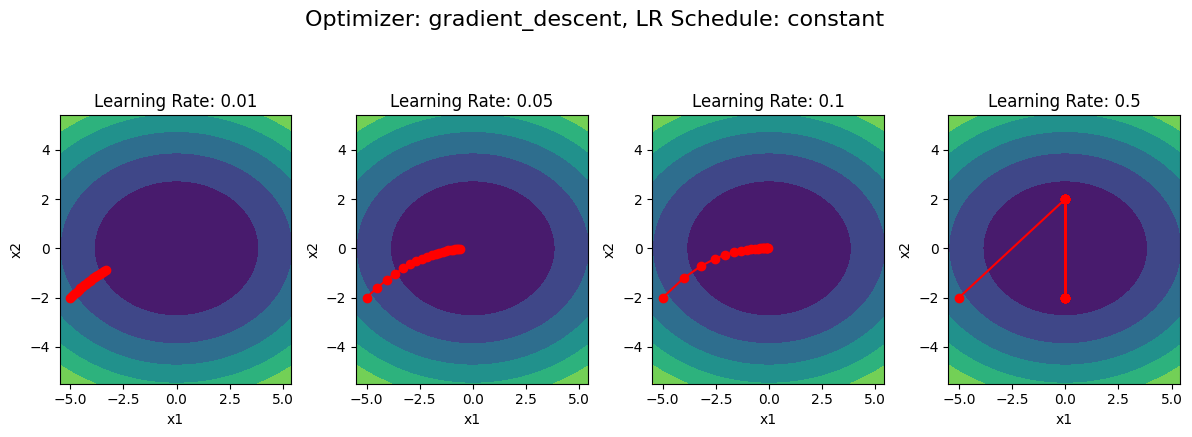

epoch 20, x1:-4.03487670358184, x2:-1.2990875961659099
epoch 20, x1:-1.6666666666666665, x2:-0.2068965517241379
epoch 20, x1:-0.5172413793103448, x2:-0.015325670498084289
epoch 20, x1:-1.6641695802115608e-07, x2:0.0


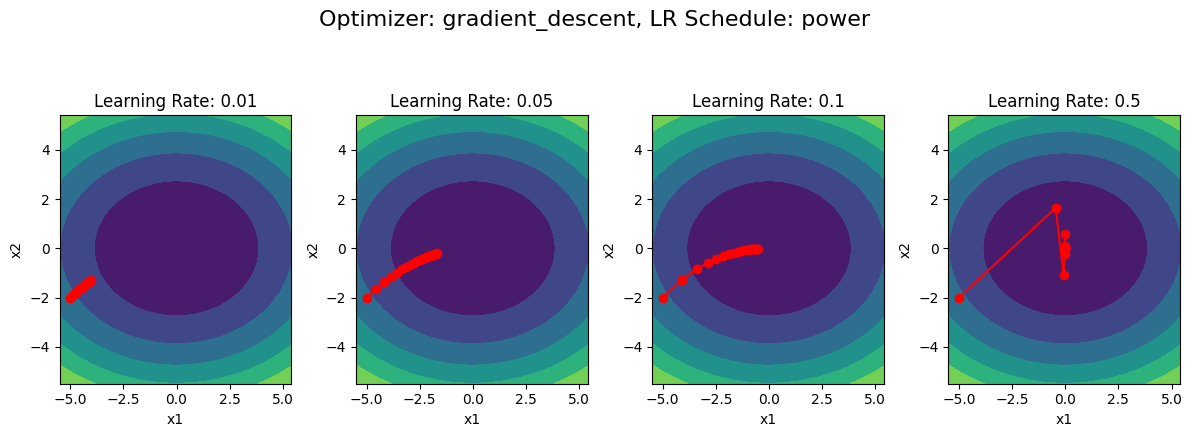

epoch 20, x1:-3.3015353017460374, x2:-0.9234759340899432
epoch 20, x1:-0.49755774546598214, x2:-0.04829932458593322
epoch 20, x1:-0.4333364804070241, x2:-0.032021833109626516
epoch 20, x1:0.10316262058441672, x2:-4.295566862506021


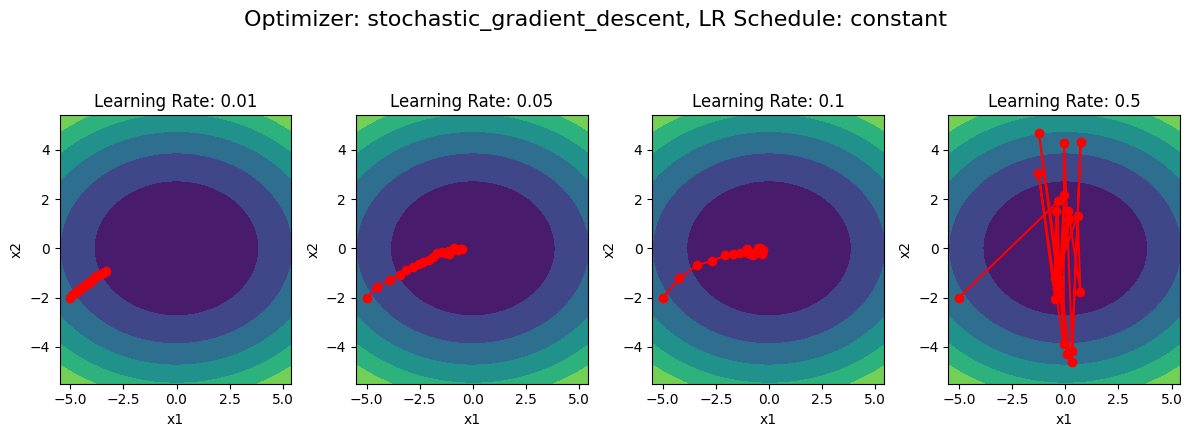

epoch 20, x1:-4.036819586596326, x2:-1.2795568092936545
epoch 20, x1:-1.6108197730029838, x2:-0.20992845350974576
epoch 20, x1:-0.3582913030886268, x2:-0.09055997769837629
epoch 20, x1:-0.18672958628122505, x2:-0.16722761372037281


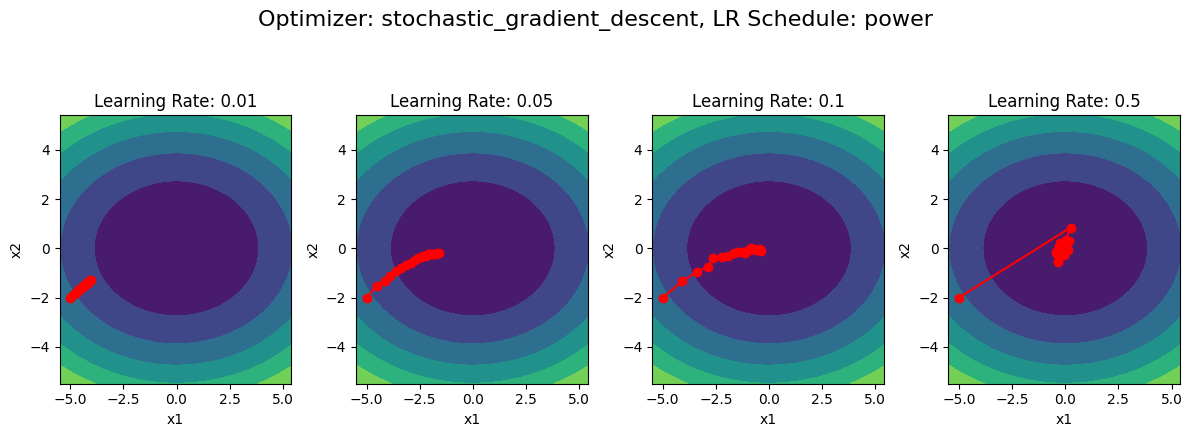

epoch 20, x1:1.353356690803952, x2:0.5511706682244132
epoch 20, x1:-1.7233372431347769, x2:0.6985052331838697
epoch 20, x1:1.7462630829596737, x2:-0.46581260357109394
epoch 20, x1:1.979170163873053, x2:0.2639640325773114


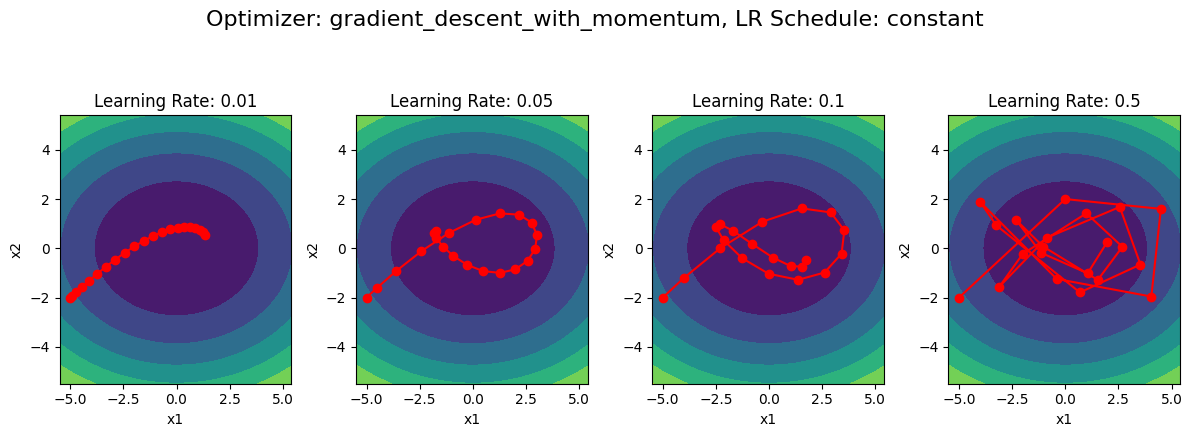

epoch 20, x1:0.05361852643579468, x2:0.8178647366818845
epoch 20, x1:0.3701658595202306, x2:-0.860724581360134
epoch 20, x1:-2.1518114534003354, x2:0.9199707440168604
epoch 20, x1:2.357722384271044, x2:0.9428835726903827


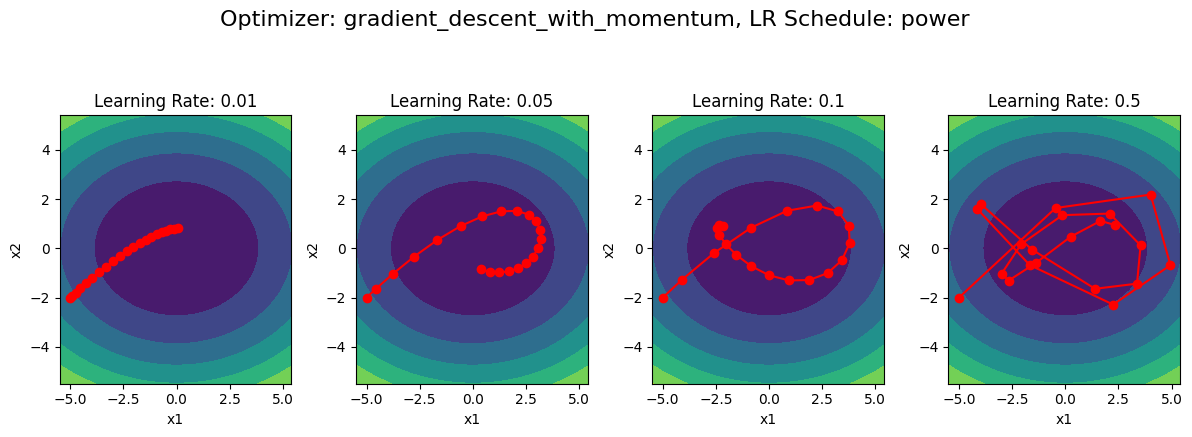

epoch 20, x1:1.6148263020774718, x2:-0.4490400168216332
epoch 20, x1:1.4758088560443912, x2:-0.6856641446528894
epoch 20, x1:-1.714160361632222, x2:-0.6521716262970431
epoch 20, x1:-1.7433922005000002, x2:-2.0


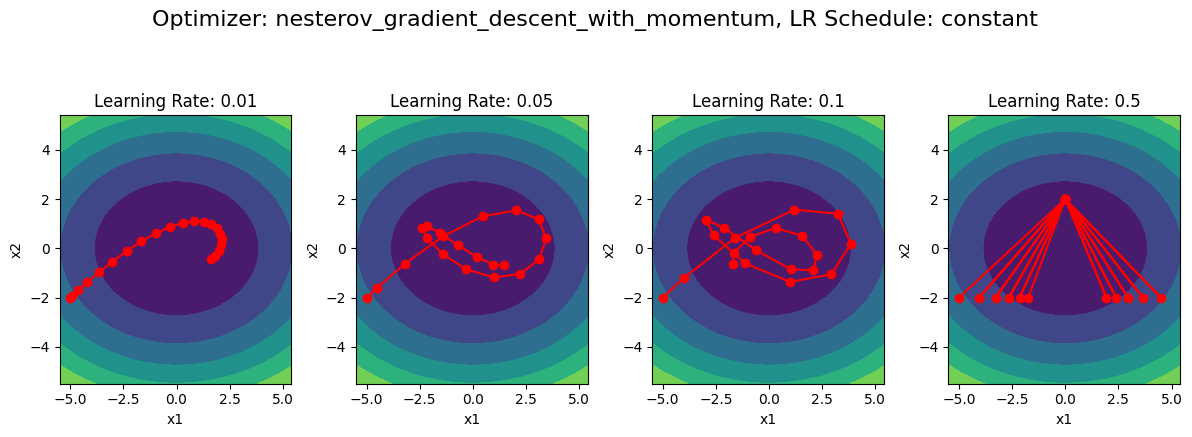

epoch 20, x1:1.9147352946700966, x2:0.7240188970127949
epoch 20, x1:-2.309251034893074, x2:0.8821579346190632
epoch 20, x1:2.205394836547657, x2:-0.8153277422822226
epoch 20, x1:2.254612227914734, x2:-0.19802589175236807


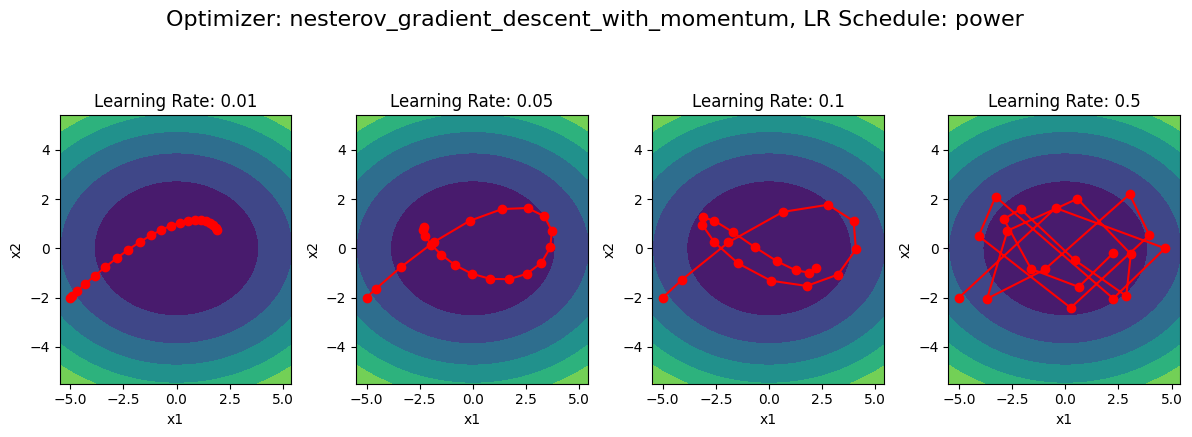

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def func(x1, x2):
  return x1**2 + 2 * x2**2

def func_grad(x1, x2):
  return (2*x1, 4*x2)


class Optimizers:
  def __init__(self, lr_schedule):
    self.lr_schedule = lr_schedule

  def lr(self, rate, t):
    if self.lr_schedule == "constant":
      return self.constant_lr(rate)
    elif self.lr_schedule == "power":
      return self.power_lr(rate, t)

  def constant_lr(self, rate):
    return rate

  def power_lr(self, rate, t):
    c = 1
    s = 10
    return rate/(1 + t/s)**c

  def gradient_descent(self, x1, x2, t1, t2, func_grad, rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0

  def stochastic_gradient_descent(self, x1, x2, t1, t2, func_grad, rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    gr_x1 += np.random.normal(0, 1)
    gr_x2 += np.random.normal(0, 1)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0

  def gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad, rate, t):
    alpha = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr(rate, t)*gr_x1
    v2 = alpha*v2 - self.lr(rate, t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2

  def nesterov_gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad, rate, t):
    alpha=0.9
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr(rate, t)*gr_x1
    v2 = alpha*v2 - self.lr(rate, t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2



def search(optimizer, func_grad, rate, iteration=20):
  x1, x2, t1, t2 = -5, -2, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad, rate, i+1)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations

def search_path(func, x_iterations, ax, title):
    ax.plot(*zip(*x_iterations), "-o", color="r")
    x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
    ax.contourf(x1, x2, func(x1, x2))
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)

def plot_different_learning_rates(optimizer_instance, optimizer_method, func_grad, rates, iterations=20):
    fig, axs = plt.subplots(1, len(rates), figsize=(12, 4))

    optimizer_name = optimizer_method.__name__
    lr_schedule = optimizer_instance.lr_schedule

    # Setting the global title for the entire figure
    fig.suptitle(f"Optimizer: {optimizer_name}, LR Schedule: {lr_schedule}", fontsize=16, y=1.08)

    for ax, rate in zip(axs, rates):
        if optimizer_name == "adam":
            x_iterations = search_adam(optimizer_method, func_grad, iterations)
        else:
            x_iterations = search(optimizer_method, func_grad, rate, iterations)

        title = f"Learning Rate: {rate}"
        search_path(func, x_iterations, ax, title)

    plt.tight_layout()
    plt.show()


def plot_all_combinations(func_grad, rates=[0.01, 0.05, 0.1, 0.5], iterations=20):
    optimization_methods = [
        'gradient_descent',
        'stochastic_gradient_descent',
        'gradient_descent_with_momentum',
        'nesterov_gradient_descent_with_momentum'
    ]

    learning_rate_types = ['constant', 'power']

    for opt_method in optimization_methods:
        for lr_type in learning_rate_types:
            opt_instance = Optimizers(lr_type)
            optimization_function = getattr(opt_instance, opt_method)
            plot_different_learning_rates(opt_instance, optimization_function, func_grad, rates, iterations)

# Example usage
plot_all_combinations(func_grad, rates=[0.01, 0.05, 0.1, 0.5], iterations=20)


epoch 20, x1:-4.26376271936066, x2:-1.3024834370787477
epoch 20, x1:-1.8828800844526354, x2:-0.05646173745279083
epoch 20, x1:-0.39647637952282616, x2:-2.315391092482214e-05
epoch 20, x1:-0.04244767446066061, x2:-1.0385276417938991e-11


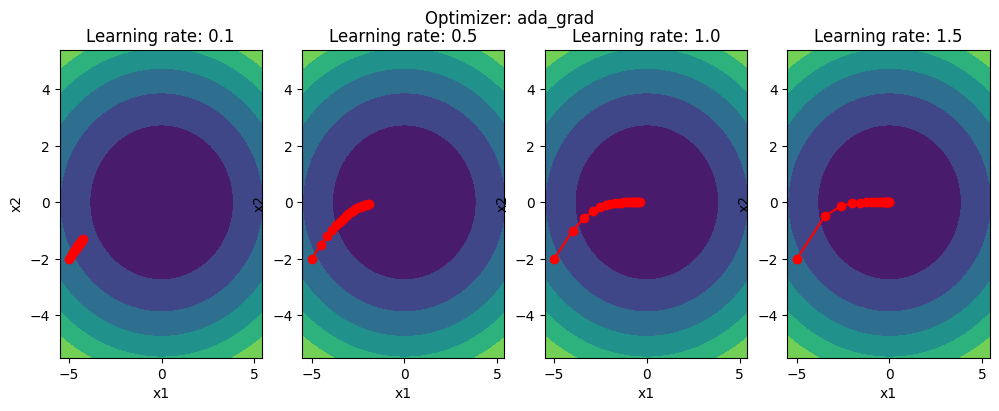

epoch 20, x1:-2.4518355726165395, x2:-0.14106798593774547
epoch 20, x1:-0.000343174646715899, x2:4.843326533006444e-13
epoch 20, x1:2.5905220542235246e-14, x2:-0.7440502470756403
epoch 20, x1:-2.412848952426654e-09, x2:-1.5654130319390136


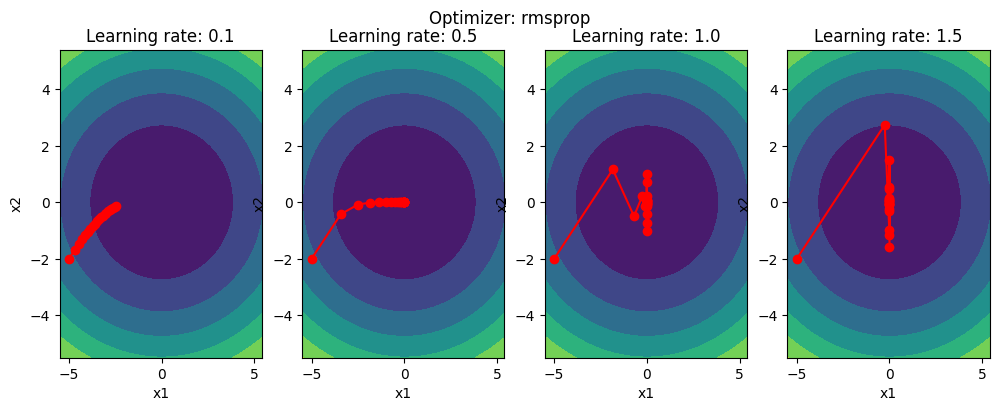

epoch 20, x1:-3.060338887144194, x2:-0.22245242845196042
epoch 20, x1:1.3557704830613673, x2:-0.4863061568008782
epoch 20, x1:-0.5318766324809652, x2:0.477090894941997
epoch 20, x1:-1.1422874807791135, x2:-0.10028793049746915


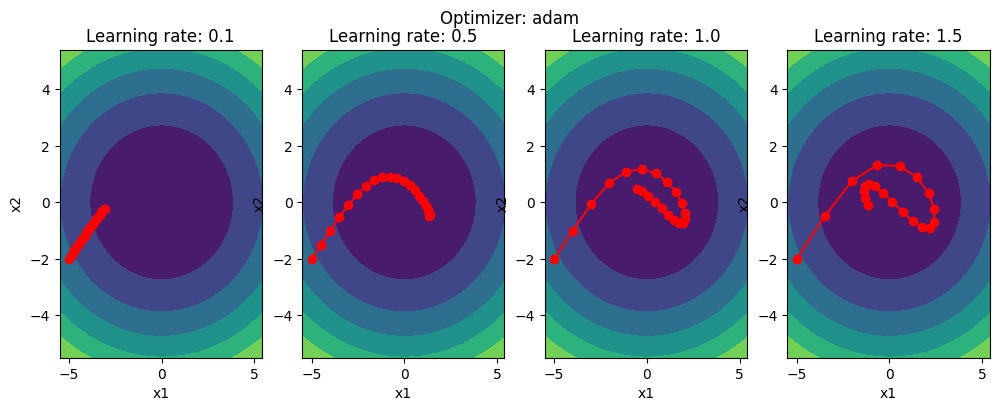

In [2]:
def func(x1, x2):
  return x1**2 + 2 * x2**2

def func_grad(x1, x2):
  return (2*x1, 4*x2)



class Optimizers:
  def __init__(self, lr_schedule, rate= 0.01):
    self.lr_schedule = self.lr(lr_schedule, rate)

  def lr(self, lr_schedule, rate):
    if lr_schedule == "constant":
      return self.constant_lr(rate)

  def constant_lr(self, rate):
    return rate

  def ada_grad(self, x1, x2, r1, r2, func_grad):
    delta = 1e-7
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 += gr_x1**2
    r2 += gr_x2**2
    x1 -= self.lr_schedule/(delta + np.sqrt(r1))*gr_x1
    x2 -= self.lr_schedule/(delta + np.sqrt(r2))*gr_x2
    return x1, x2, r1, r2

  def rmsprop(self, x1, x2, r1, r2, func_grad):
    delta = 1e-7
    rho = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 = r1*rho + (1-rho)*gr_x1**2
    r2 = r2*rho + (1-rho)*gr_x2**2
    x1 -= self.lr_schedule/np.sqrt(delta+r1)*gr_x1
    x2 -= self.lr_schedule/np.sqrt(delta+r2)*gr_x2
    return x1, x2, r1, r2

  def adam(self, x1, x2, s1, s2, r1, r2, t, func_grad):
    delta, rho1, rho2 = 1e-8, 0.9, 0.999
    gr_x1, gr_x2 = func_grad(x1, x2)

    s1 = rho1*s1 + (1-rho1)*gr_x1
    s2 = rho1*s2 + (1-rho1)*gr_x2

    r1 = rho2*r1 + (1-rho2)*gr_x1**2
    r2 = rho2*r2 + (1-rho2)*gr_x2**2

    shat1 = s1/(1-rho1**(t+1))
    shat2 = s2/(1-rho1**(t+1))

    rhat1 = r1/(1-rho2**(t+1))
    rhat2 = r2/(1-rho2**(t+1))

    x1 -= self.lr_schedule*shat1/(np.sqrt(rhat1)+delta)
    x2 -= self.lr_schedule*shat2/(np.sqrt(rhat2)+delta)

    return x1, x2, s1, s2, r1, r2


def search(optimizer, func_grad, iteration=20):
  x1, x2, t1, t2 = -5, -2, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations




def search_adam(optimizer_adam, func_grad, iterations=20):
  x1, x2, s1, s2, r1, r2 = -5, -2, 0, 0, 0, 0
  x_iterations = [(x1, x2)]
  for t in range(iterations):
    x1, x2, s1, s2, r1, r2 = optimizer_adam(x1, x2, s1, s2, r1, r2, t, func_grad)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(t+1, x1, x2))
  return x_iterations


def search_path(func, x_iterations):
  plt.plot(*zip(*x_iterations), "-o", color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")





def plot_optimizers(func, func_grad, learning_rates, iterations=20):
  # Initialize optimizers
  optimizer_methods = ["ada_grad", "rmsprop", "adam"]

  for opt_name in optimizer_methods:
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"Optimizer: {opt_name}")

    for i, lr in enumerate(learning_rates):
      optimizer = Optimizers("constant", lr)
      opt_func = getattr(optimizer, opt_name)

      if opt_name == "adam":
        x_iterations = search_adam(opt_func, func_grad, iterations)
      else:
        x_iterations = search(opt_func, func_grad, iterations)

      plt.subplot(1, len(learning_rates), i + 1)
      plt.title(f"Learning rate: {lr}")
      search_path(func, x_iterations)

    plt.show()

# Define the list of learning rates you want to test
learning_rates = [0.1, 0.5, 1.0 , 1.5]

# Call the plotting function
plot_optimizers(func, func_grad, learning_rates)